In [1]:
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

#### Questão 1
Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [2]:

df = sns.load_dataset('mpg')
display(df.head())

print('-' * 100)

print(df.isna().sum())

print('-' * 100)

df = df.dropna()

print(f' O df está com {df.shape[0]} registros e {df.shape[1]} colunas')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


----------------------------------------------------------------------------------------------------
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
----------------------------------------------------------------------------------------------------
 O df está com 392 registros e 9 colunas


#### Questão 2
Qual a quantidade de carros por origem (*origin*)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

 
Temos aqui a relação da quantidade de carros pela origem: 
origin
europe     68
japan      79
usa       245
Name: name, dtype: int64
--------------------------------------------------
A lista com os nomes das regiões: Index(['europe', 'japan', 'usa'], dtype='object', name='origin')
--------------------------------------------------
A lista com os valores de acordo com as regiões: [ 68  79 245]
--------------------------------------------------
Gráfico da relação: 


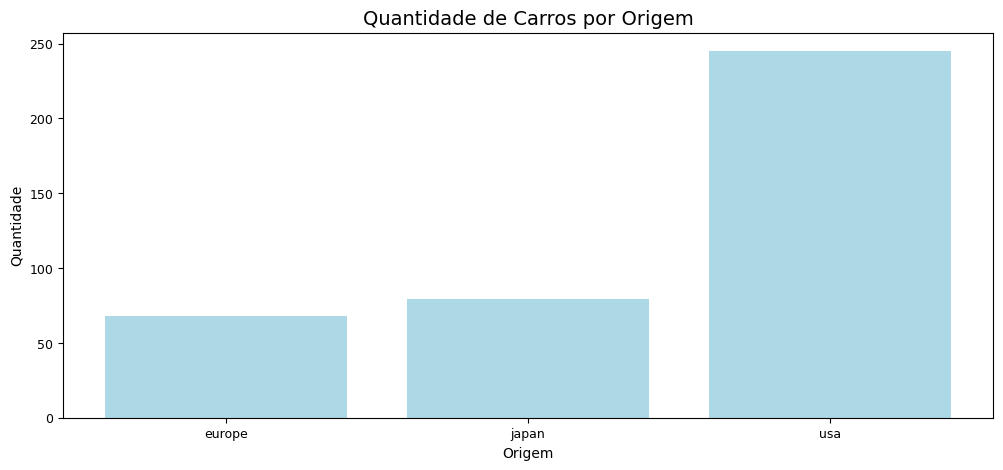

In [3]:
# Fazendo o agrupamento da origem dos carros

df_origin = df.groupby('origin')['name'].count()

print(f''' 
Temos aqui a relação da quantidade de carros pela origem: 
{df_origin}''')

print('-' * 50)

# Separando os eixos x e y para a plotagem do gráfico

x_plot = df_origin.index
y_plot = df_origin.values

print(f'A lista com os nomes das regiões: {x_plot}') 

print('-' * 50)

print(f'A lista com os valores de acordo com as regiões: {y_plot}')

print('-' * 50)

# Plotando o gráfico

print('Gráfico da relação: ')

fig = plt.figure(figsize = (12,5))
plt.bar(x_plot, y_plot, data=df_origin, color = 'lightblue')
plt.title('Quantidade de Carros por Origem', fontsize = 14)
plt.xlabel('Origem', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

#### Questão 3
Qual a média da potência (*horsepower*) dos carros por origem?

origin
europe     80.558824
japan      79.835443
usa       119.048980
Name: horsepower, dtype: float64

----------------------------------------------------------------------------------------------------
Gráfico da relação: 


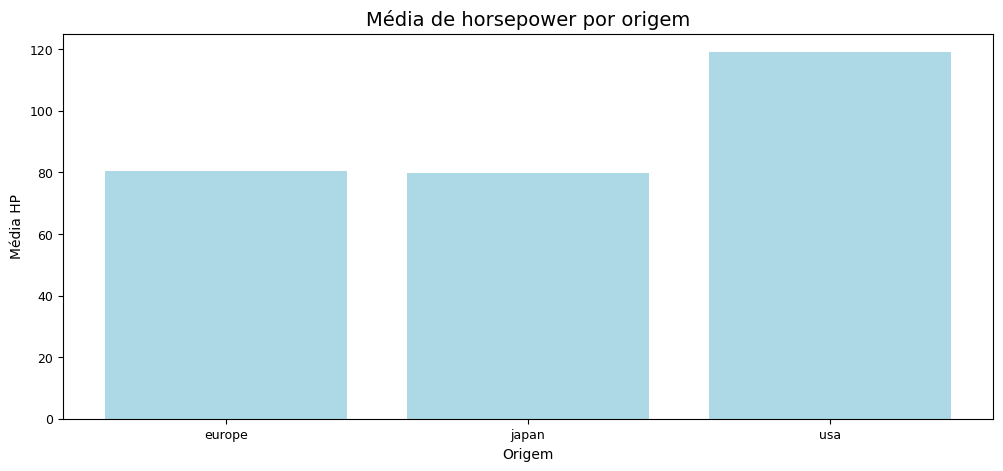

In [4]:
df_hp = df.groupby('origin')['horsepower'].mean()

display(df_hp)
print('-' * 100)

x_plot = df_hp.index
y_plot = df_hp.values

print('Gráfico da relação: ')

fig = plt.figure(figsize = (12,5))
plt.bar(x_plot, y_plot, data=df_origin, color = 'lightblue')
plt.title('Média de horsepower por origem', fontsize = 14)
plt.xlabel('Origem', fontsize=10)
plt.ylabel('Média HP', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()



#### Questão 4
Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) cos carros?

C:\Users\lfili\AppData\Local\Temp\ipykernel_16392\1978990822.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


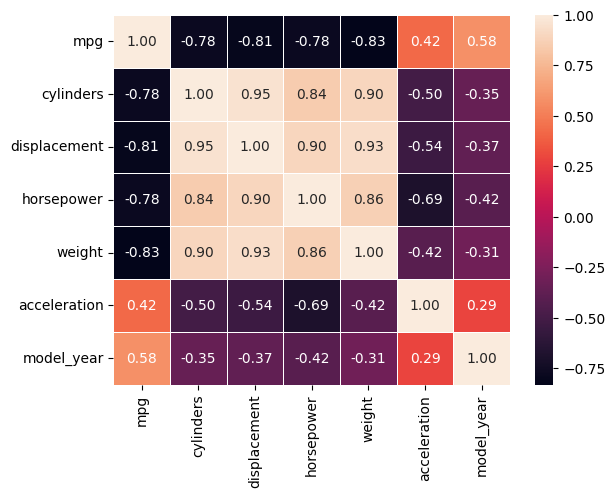

In [5]:
# Plotando um heatmap para a correlação do dataframe inteiro

correlation = df.corr()
plot = sns.heatmap(correlation, annot = True, fmt='.2f', linewidths=.6)

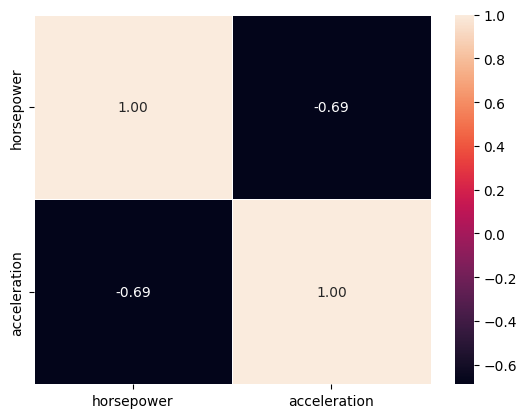

In [6]:
# Separando o df em horsepower e acceleration para fazer a correlação

hp_acc = df[['horsepower', 'acceleration']]
correlacao = hp_acc.corr()

# Plotando o heatmap da correlação entre os dois

plot = sns.heatmap(correlacao, annot = True, fmt='.2f', linewidths=.6)

#### Questão 5
Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros, segmentando de acordo com a origem (*origin*) com cores diferentes e plotando no mesmo eixo (*axes*)?

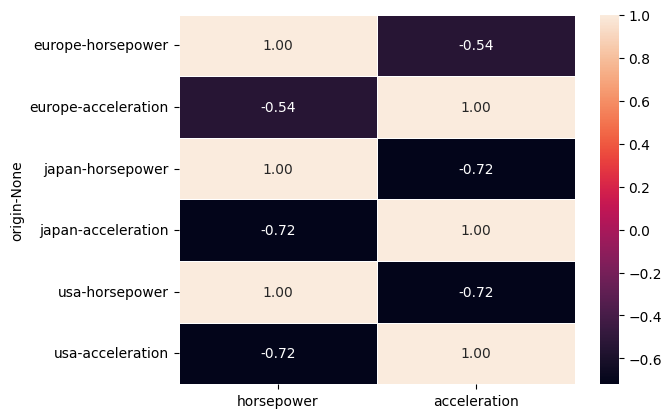

In [7]:
# Separando o df por região com horspower e acceleration
df_hp_acc = df.groupby('origin')[['horsepower', 'acceleration']].corr()

# Plotando o heatmap para visualização da correlação

plot = sns.heatmap(df_hp_acc, annot = True, fmt='.2f', linewidths=.6)